In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal 

In [24]:
sub1 = loadmat("/content/drive/MyDrive/2021_VIIT_P300_Session2 /Hackathon Oct 2021/RAW Competition Data/S1.mat")
sub1['y'].shape

(60871, 8)

In [8]:
sub1_X = sub1['y']
sub1_Y = sub1['trig']

In [25]:
sub1_

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int16)

In [12]:
np.where(sub1_Y!=0)[0].shape

(1200,)

In [26]:
idx = np.where(sub1_Y==1)
x= sub1_X[idx[0],:]
x.shape

(150, 8)

In [28]:
idx[0]

array([ 1430,  1828,  2362,  2492,  2761,  3203,  3558,  3953,  4179,
        4665,  4930,  5241,  5947,  6126,  6703,  6834,  7013,  7544,
        8165,  8253,  8565,  8653,  9228,  9669,  9850, 10203, 10997,
       11131, 11398, 11488, 13393, 13616, 14105, 14548, 15035, 15213,
       15475, 15921, 16143, 16453, 17028, 17339, 17695, 17916, 18314,
       18714, 18936, 19111, 19866, 20087, 20353, 20752, 21062, 21548,
       21725, 22165, 22391, 23055, 23451, 23760, 25274, 25629, 25894,
       25984, 26997, 27045, 27312, 27621, 28154, 28199, 28860, 29128,
       29483, 29661, 30192, 30634, 30768, 30988, 31610, 31784, 32187,
       32584, 32984, 33204, 33603, 34091, 34490, 34667, 35066, 35465,
       37461, 37682, 38131, 38308, 38486, 38972, 39372, 39461, 39948,
       40390, 41101, 41146, 41367, 41410, 42120, 42472, 42785, 43181,
       43580, 43802, 44203, 44777, 44955, 45352, 45885, 46107, 46638,
       46858, 47525, 47612, 49169, 49522, 49830, 50184, 50673, 50763,
       51605, 51648,

In [81]:
idx = np.where(sub1_Y==1)
X_pos = sub1_X[idx[0][0]:idx[0][0]+200,:]
# pos_stim = stim[idx[0][0],:]
X_pos.shape

(200, 8)

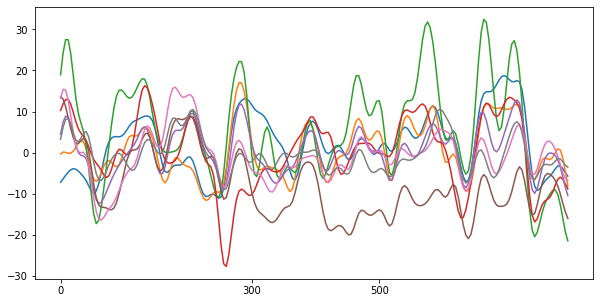

In [21]:
plt.figure(figsize=(10,5))
plt.xticks([0, 75, 125], ['0', '300', '500'], rotation = 0)
plt.plot(X_pos)

In [91]:
############# BUTTERWORTH FILTER ###############
butter_order = 8 # Order of the filter
f_cut_low = 0.1 # Low cut frequency [hz]
f_cut_high = 30 # High cut frequency [hz]
band_type = 'bandpass'

sos = signal.butter(butter_order, [f_cut_low, f_cut_high], 
                    band_type, fs= f_s, output='sos', analog=False)


In [92]:
idx= np.where(sub1_Y!=0)
X=np.empty((1200,200,8))
Y= np.empty((1200))
ctr=0
for j in range (0,idx[0].shape[0]):
  epoch = sub1_X[idx[0][j]:idx[0][j]+200,:]
  epoch = signal.sosfiltfilt(sos, epoch,axis=0) # Filtering of the epoch
  X[ctr,:]=epoch
  Y[ctr]=sub1_Y[idx[0][j]]
  ctr+=1
X.shape,Y.shape,ctr

((1200, 200, 8), (1200,), 1200)

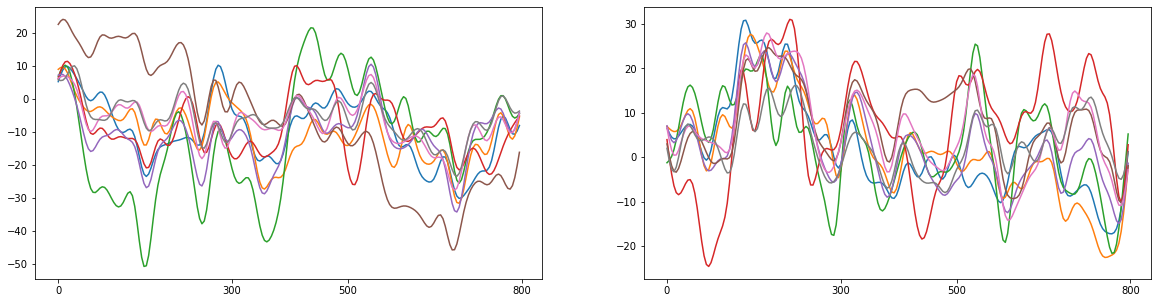

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
idx_temp = np.where(Y==1)[0]
plt.xticks([0, 75, 125,200], ['0', '300', '500','800'], rotation = 0)
plt.plot(X[idx_temp[1]])
plt.subplot(1,2,2)
idx_temp2= np.where(Y==-1)[0]
plt.xticks([0, 75, 125,200], ['0', '300', '500','800'], rotation = 0)
plt.plot(X[idx_temp2[1]])

(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)


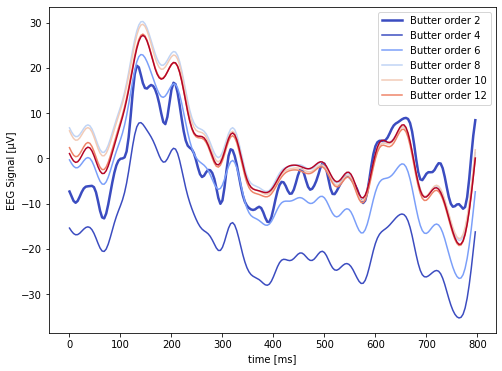

In [77]:
butter_order = [2,4,6,8,10,12] # Order of the filter
f_cut_low = 0.1 # Low cut frequency [hz]
f_cut_high = 30 # High cut frequency [hz]
band_type = 'bandpass'
f_s = 240

sos = [] # Initialise array where to store sos values computed from the filter
trial = 1 
channel = 0

def plot_butter_filter(butter_order, epoch, f_s, f_cut_low, f_cut_high, band_type):
  filt_epoch = [] # Signal epoch preprocessed using different filters
  for i in range(len(butter_order)): 
      sos.append(signal.butter(butter_order[i], [f_cut_low, f_cut_high], band_type, fs= f_s, output='sos', analog=False))
      
      filt_epoch.append(signal.sosfiltfilt(sos[i], epoch,axis=0)) # Filtering of the epoch

  filt_epoch = np.array(filt_epoch)    

  return filt_epoch

filt_epoch = plot_butter_filter(butter_order, X[trial, :,channel], 240, 0.1, 20, 'bandpass')      

# Create figure and add axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Time values
t = np.arange(0, 800, 1000/250).astype(int)
print(t.shape)
# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', len(butter_order))

# Plot the signal as baseline
ax.plot(t,X[trial, :,channel] , color=colors(0), linewidth=2.5)

# Plot filtered signal 
for i in range(len(butter_order)):
    t = np.arange(0, 800, 1000/250).astype(int)
    y = filt_epoch[i]
    print(y.shape)
    ax.plot(t, y, color=colors(i), linewidth=1.5)

labels = ['Butter order 2', 'Butter order 4', 'Butter order 6', 'Butter order 8', 'Butter order 10', 'Butter order 12']
ax.legend(labels, loc='best');
plt.ylabel('EEG Signal [μV]');
plt.xlabel('time [ms]'); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

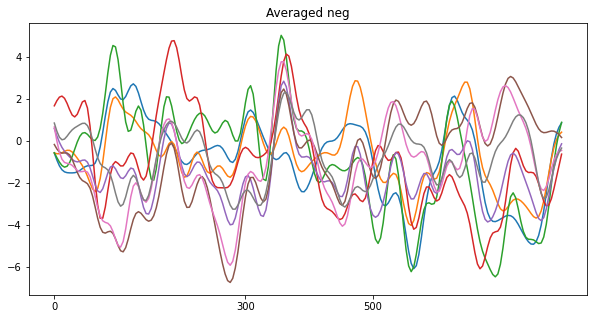

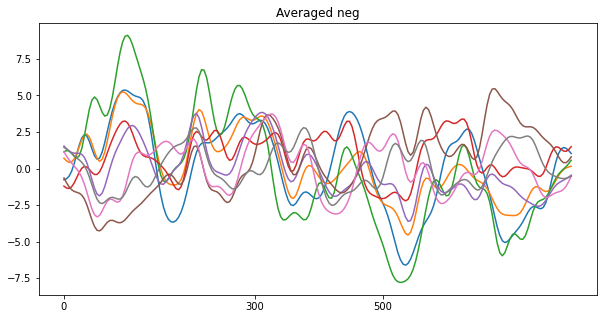

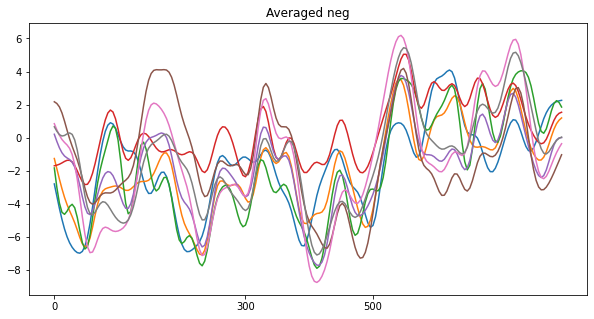

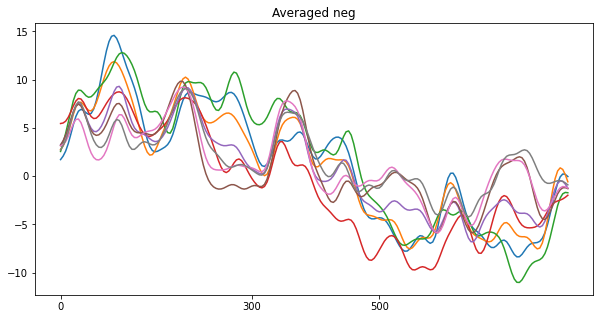

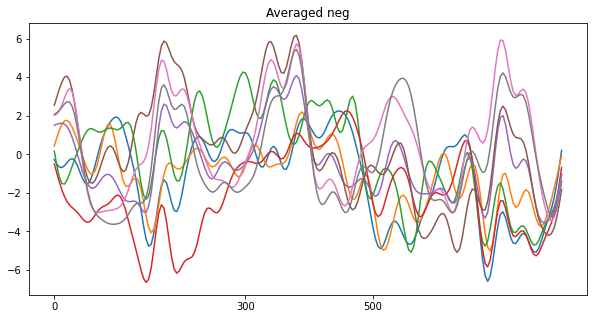

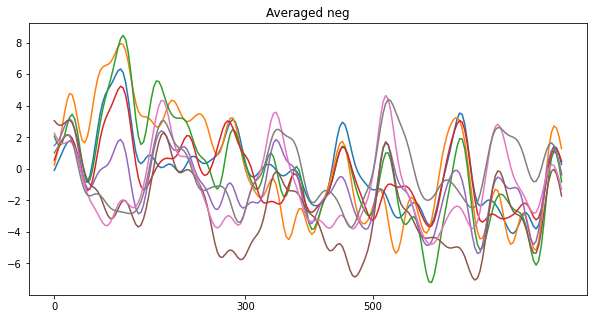

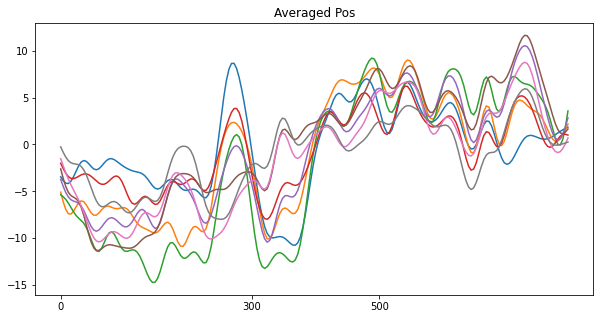

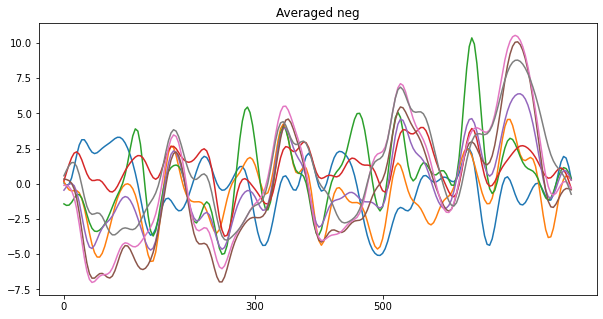

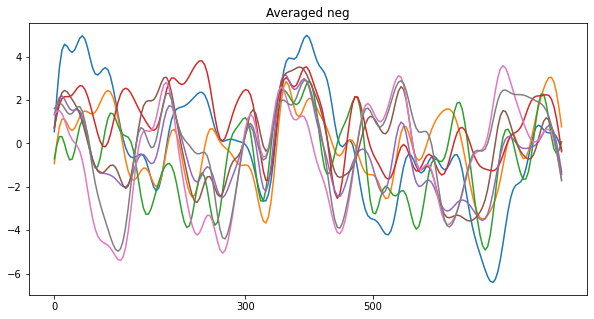

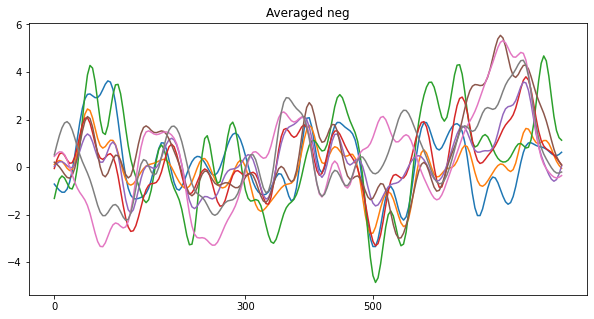

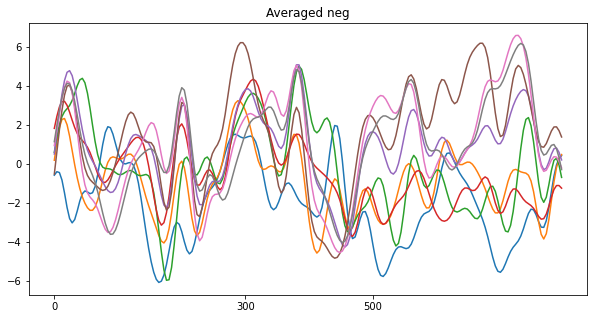

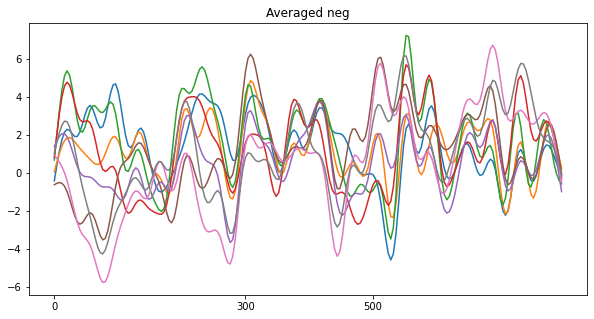

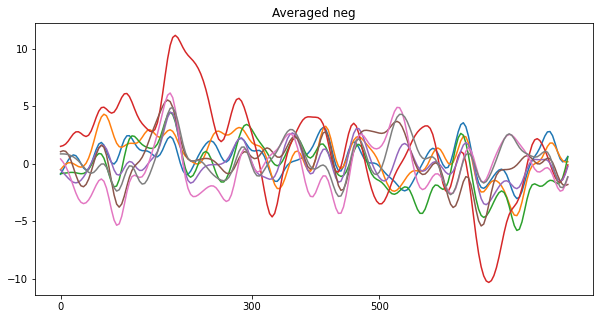

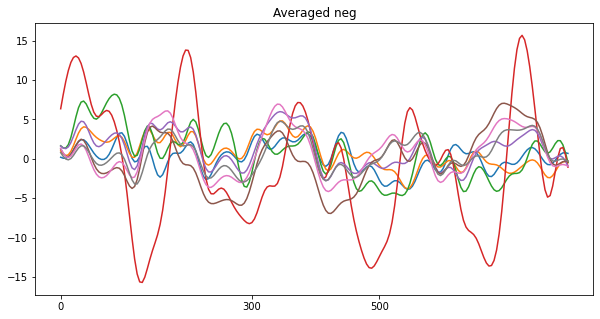

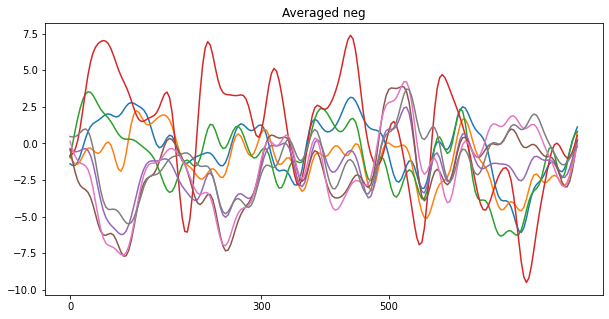

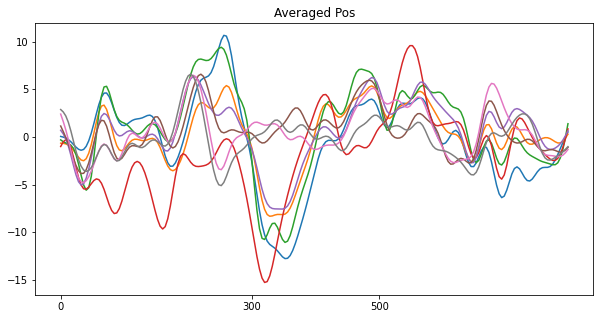

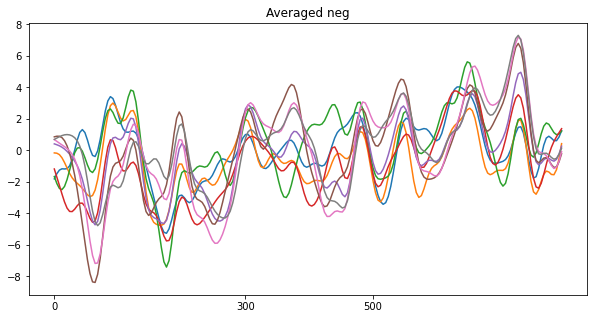

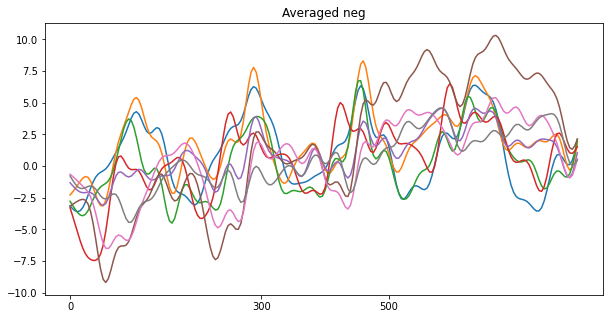

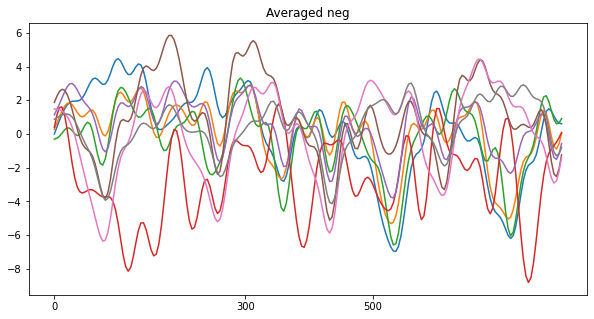

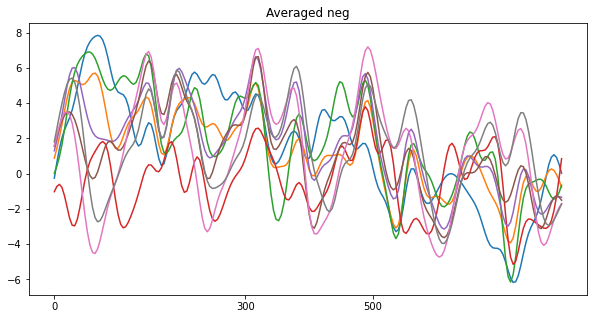

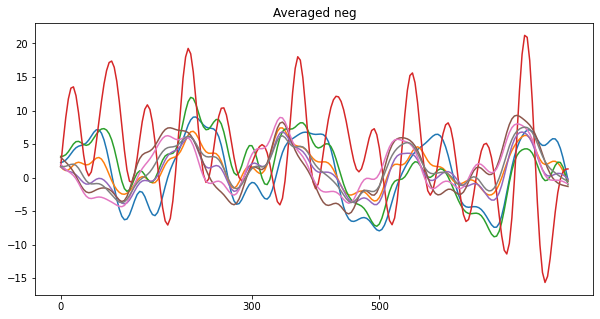

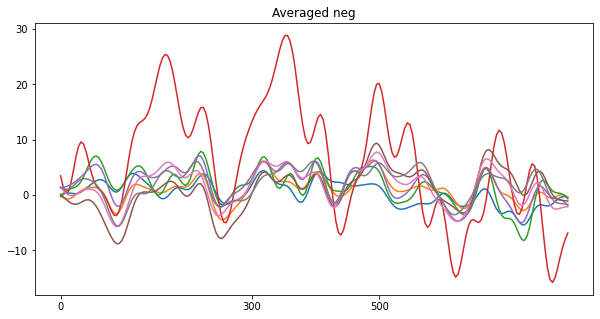

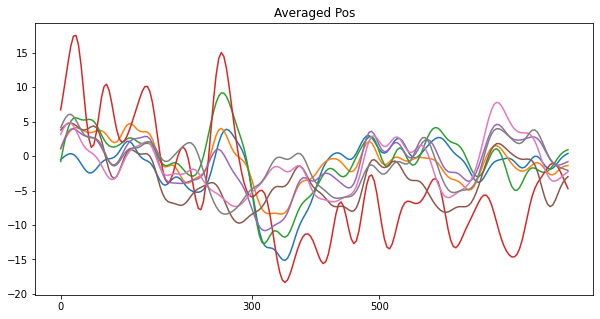

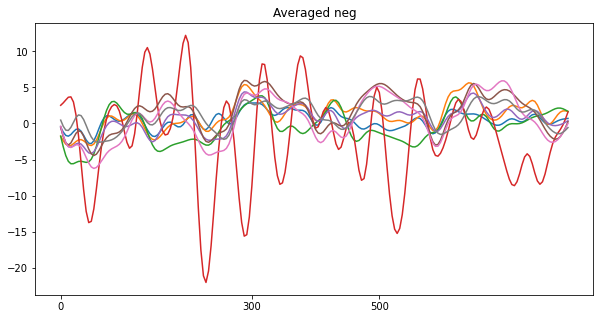

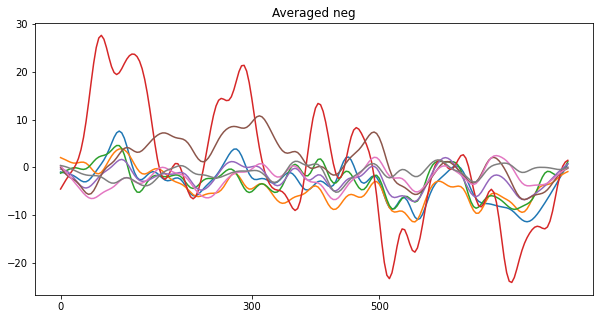

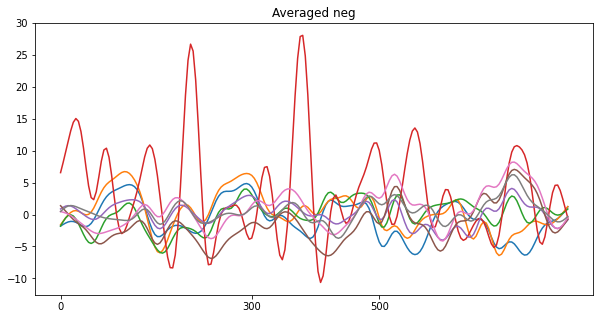

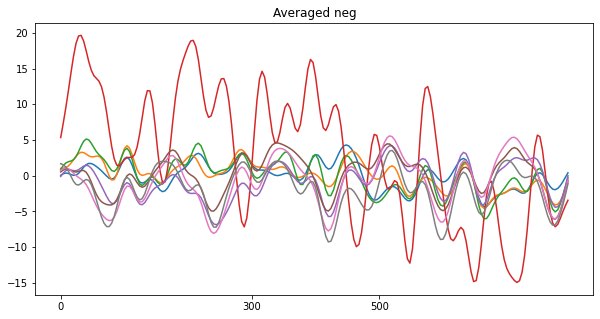

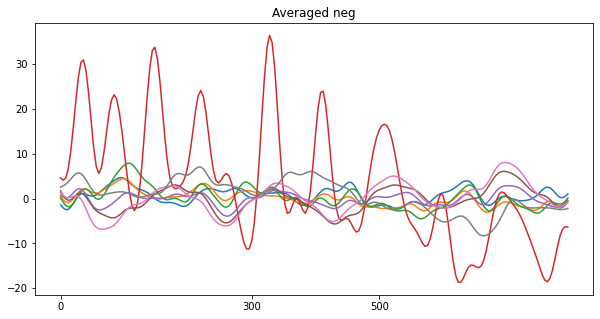

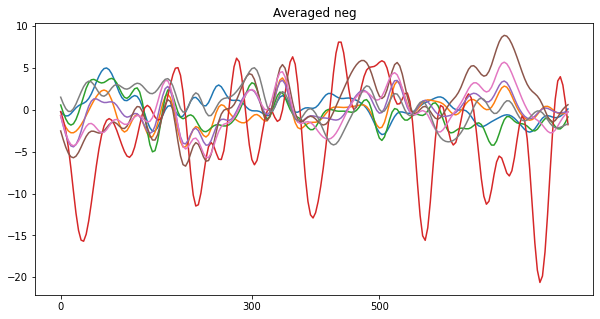

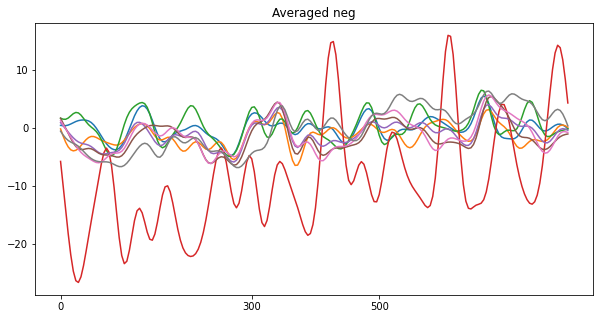

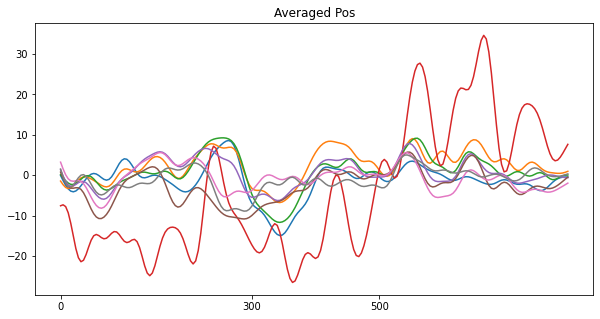

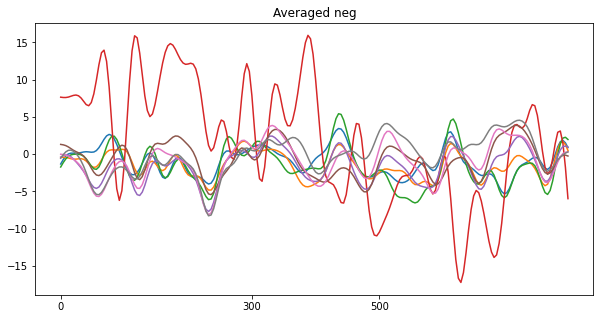

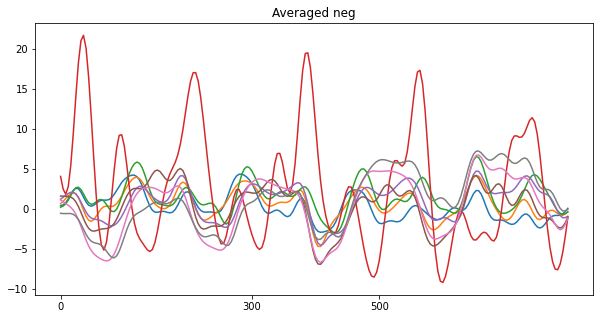

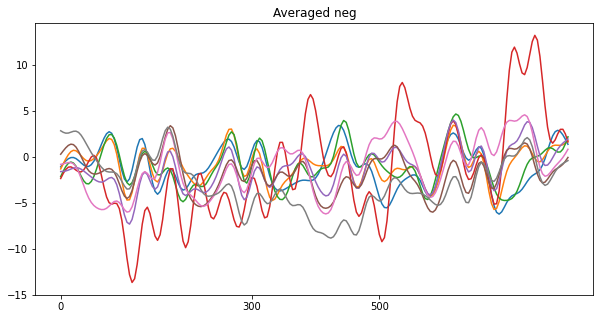

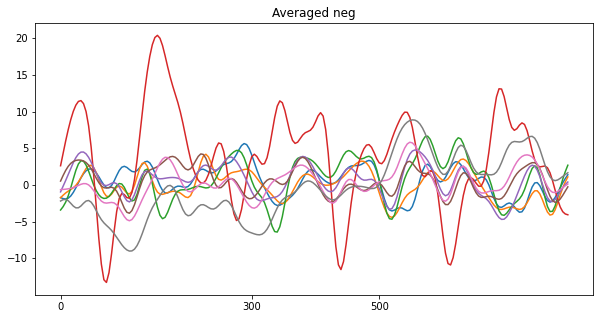

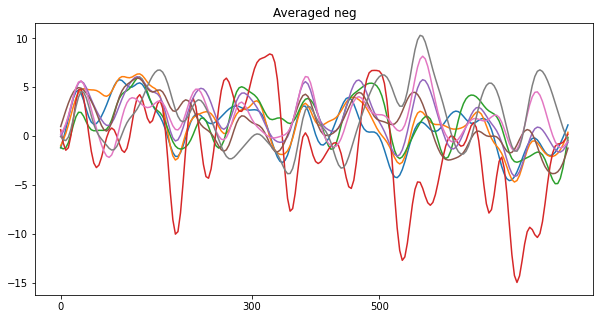

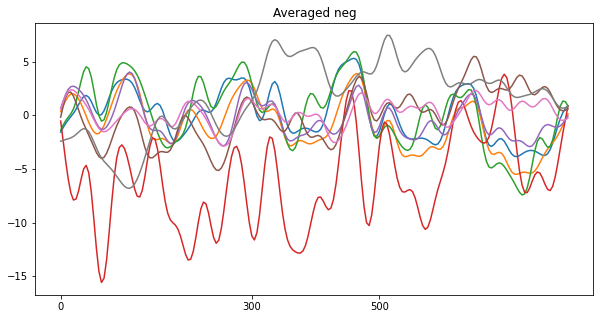

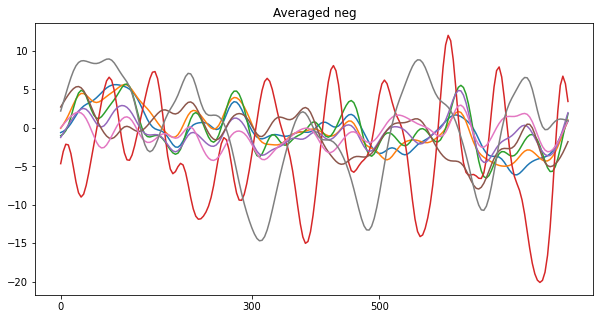

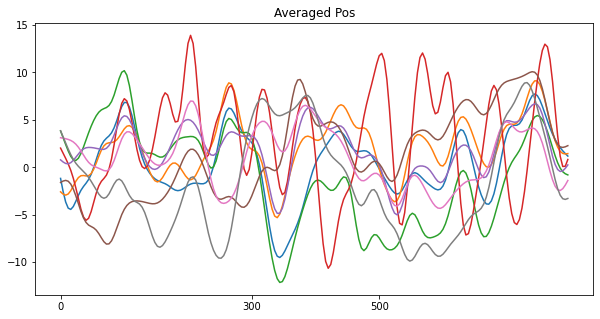

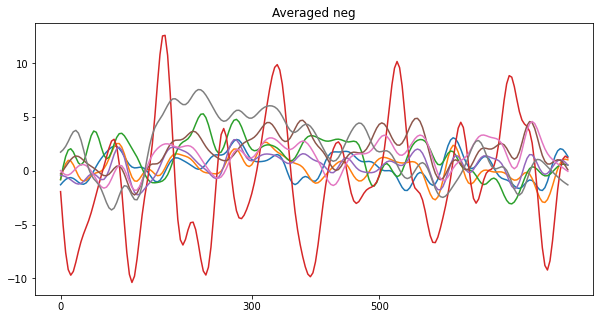

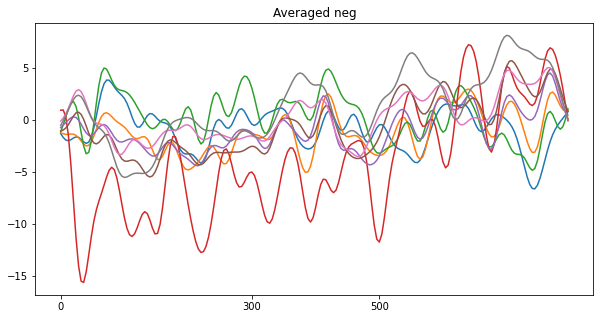

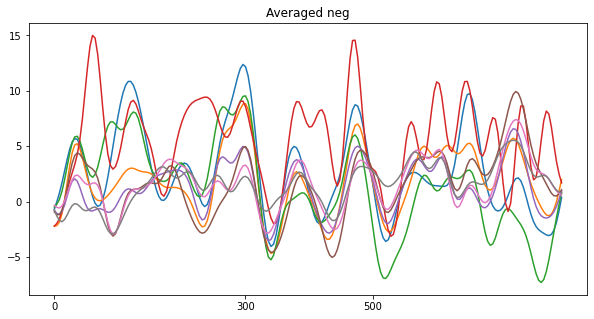

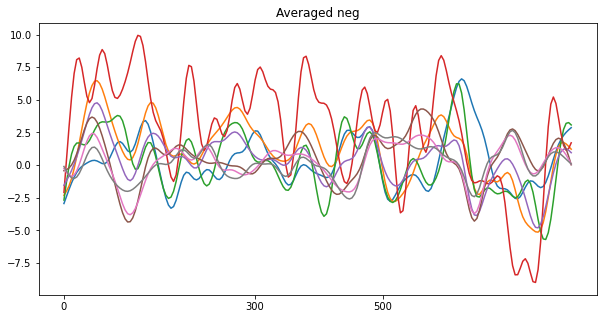

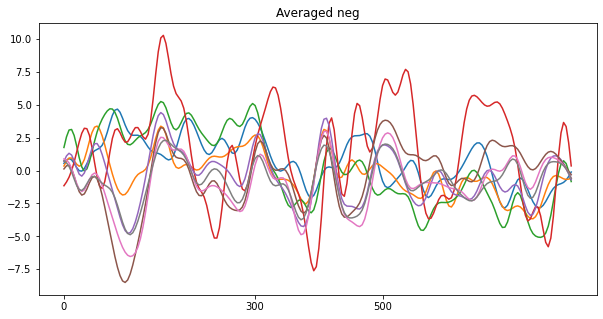

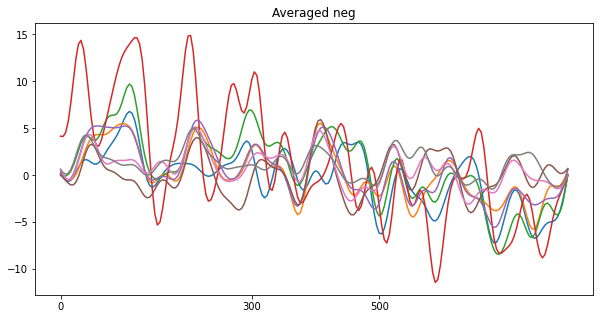

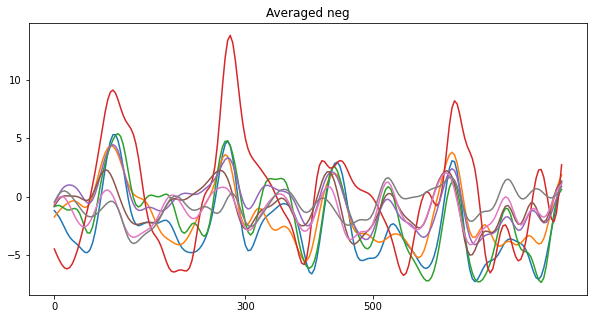

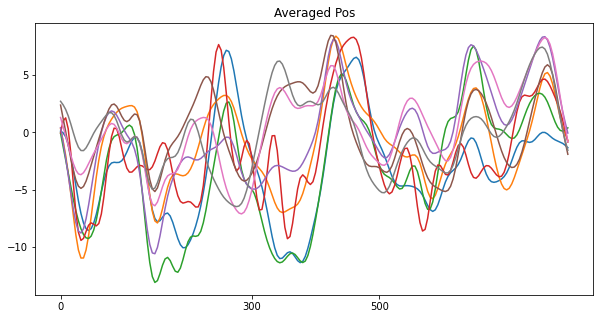

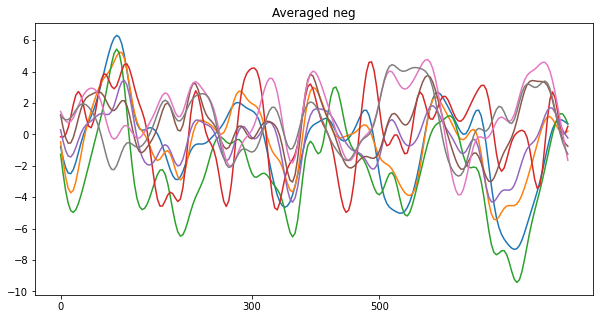

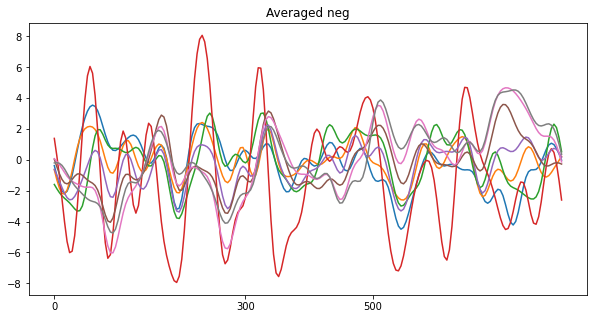

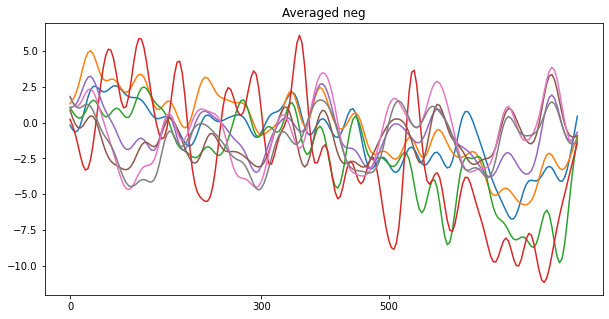

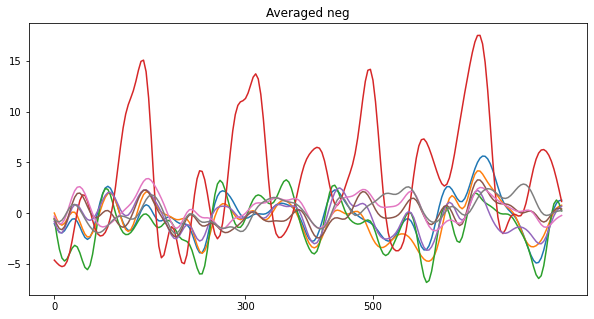

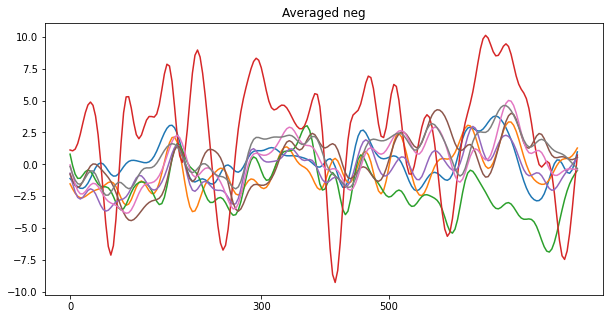

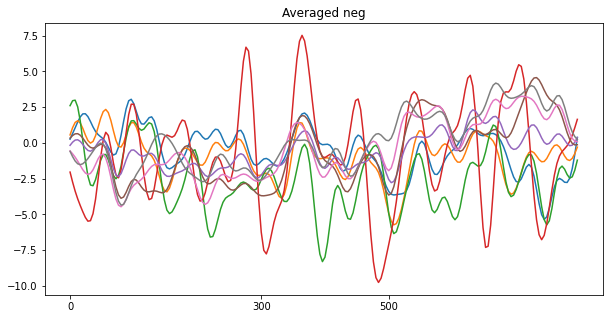

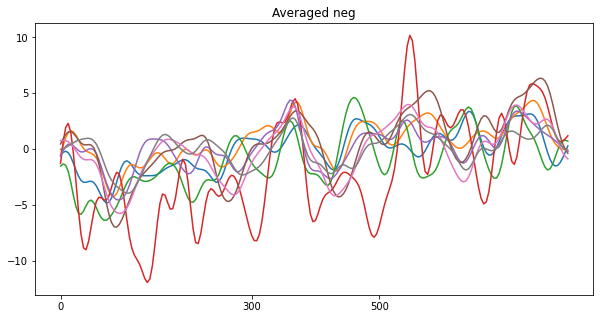

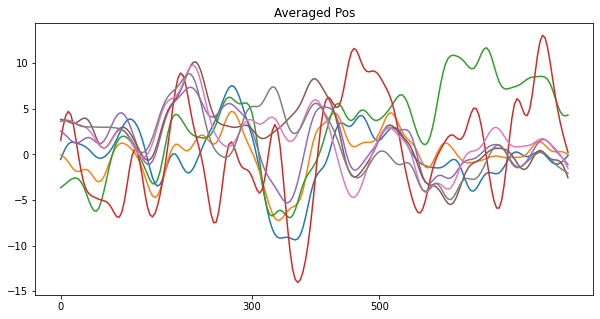

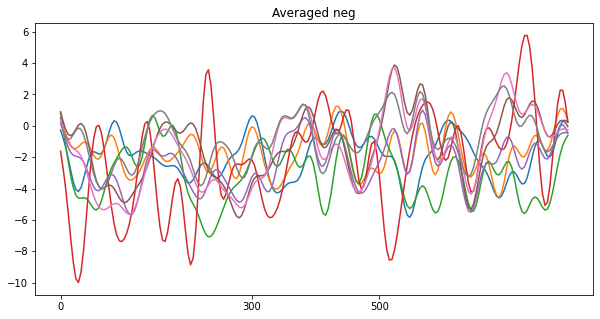

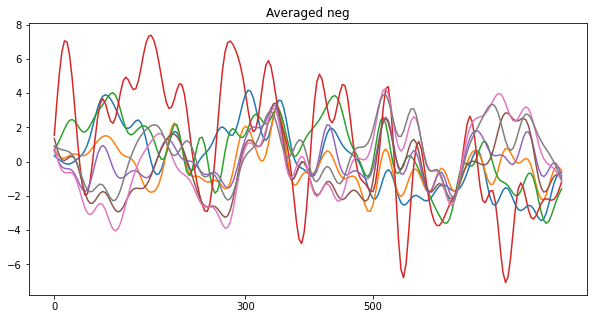

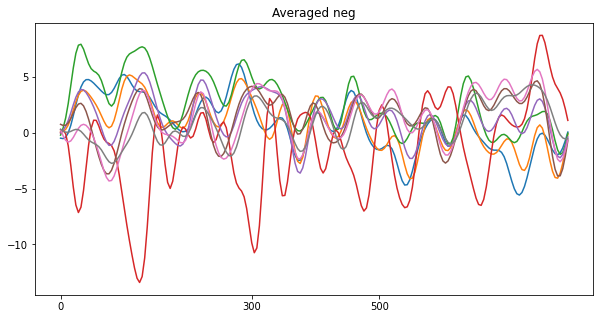

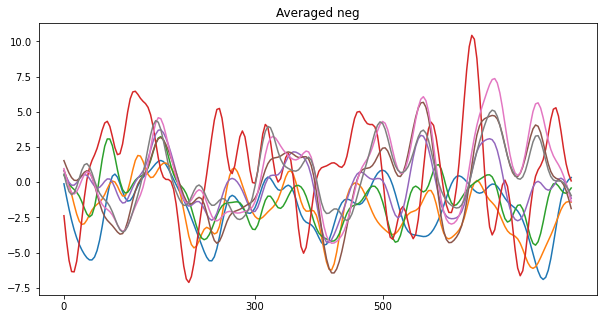

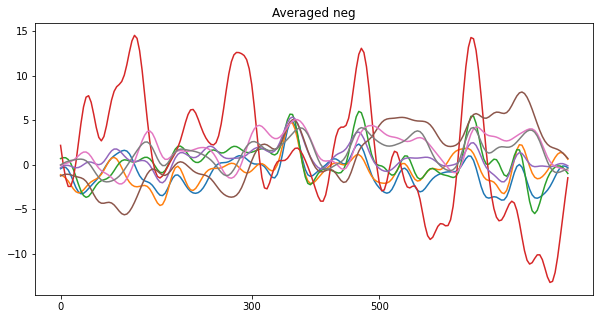

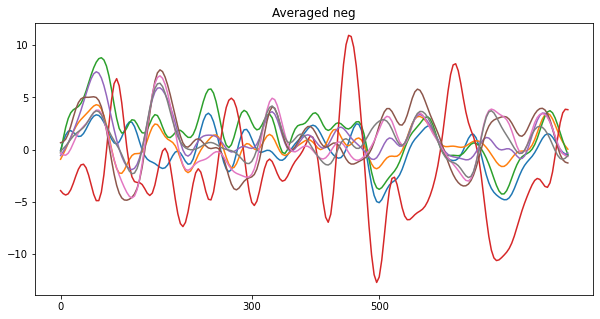

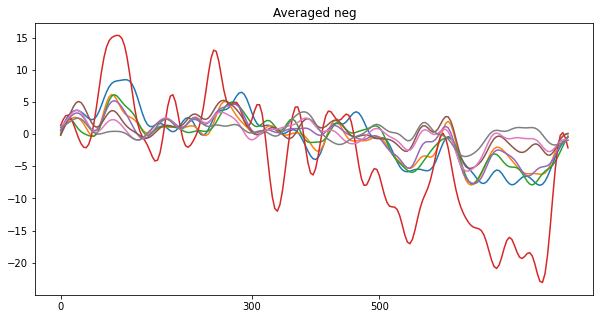

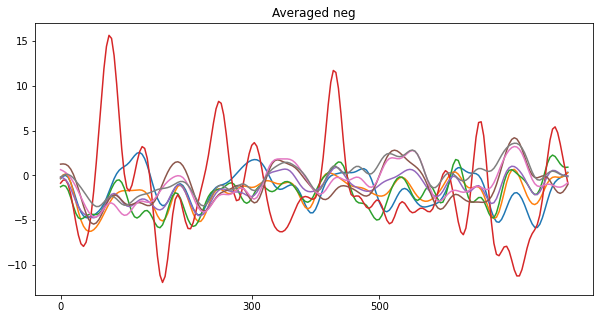

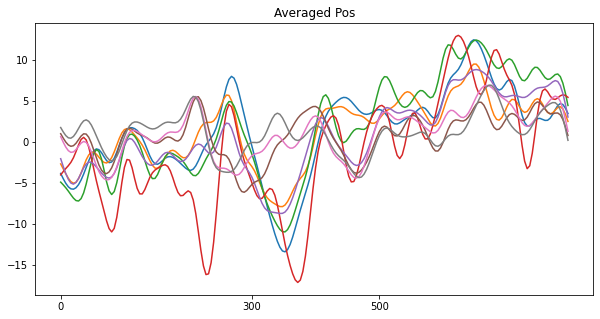

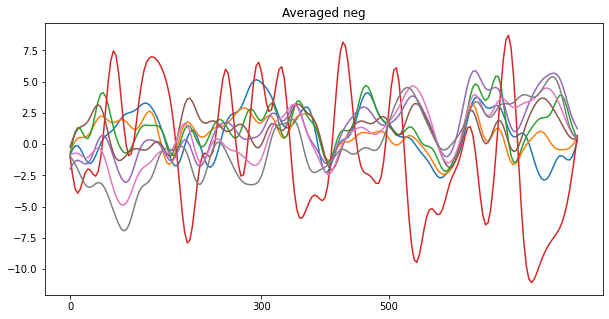

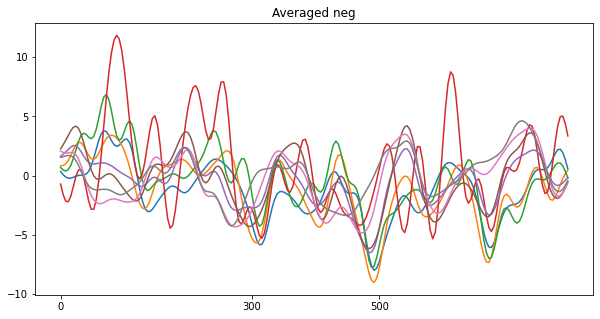

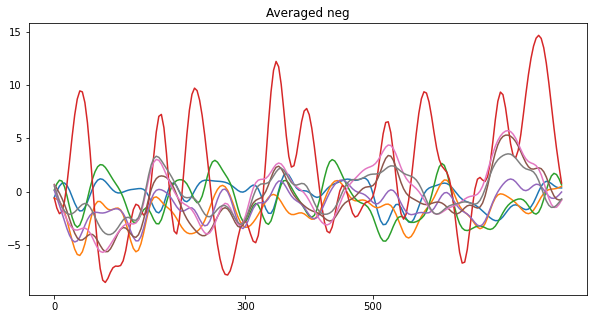

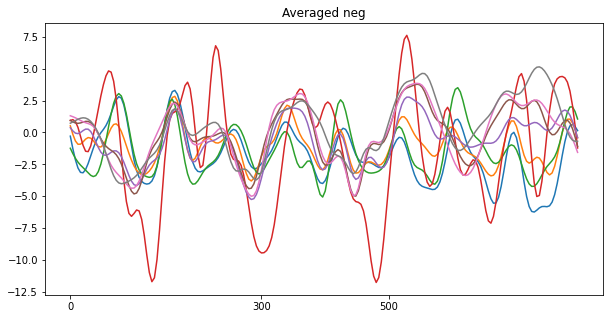

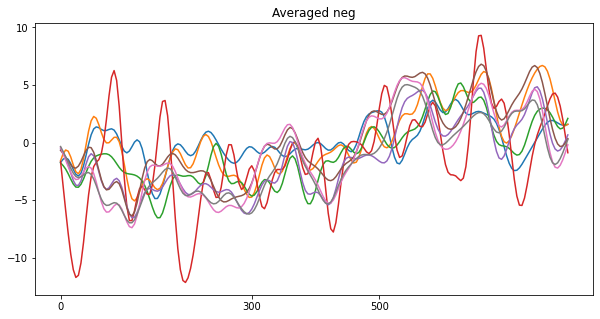

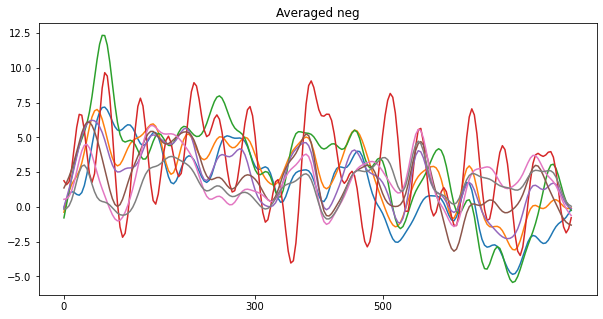

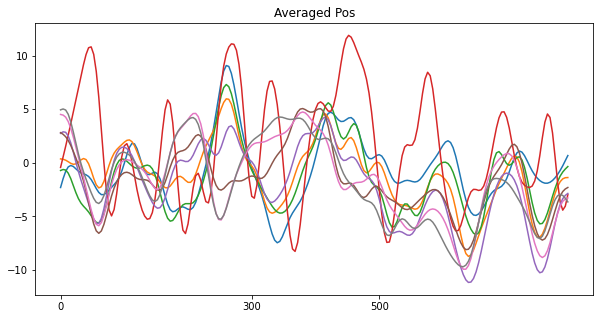

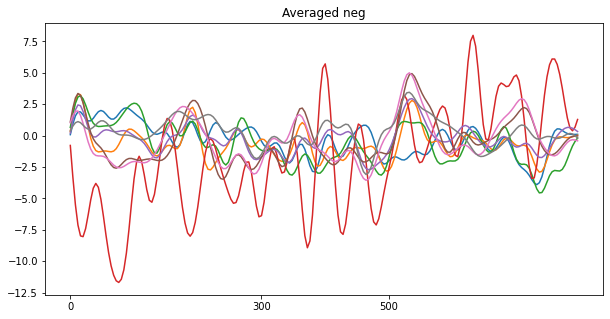

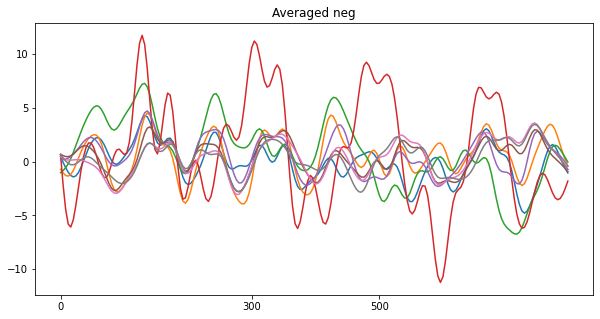

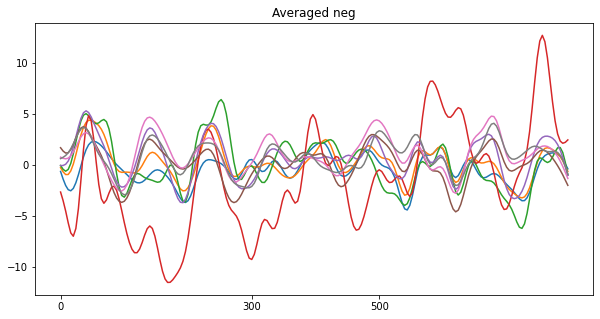

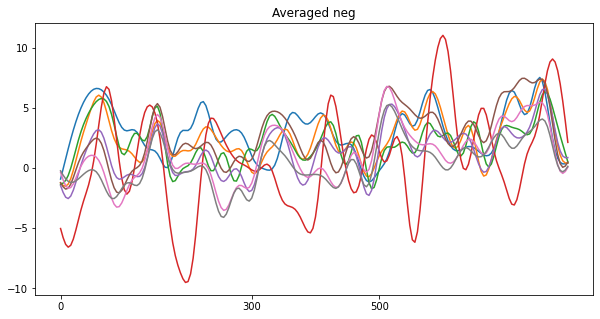

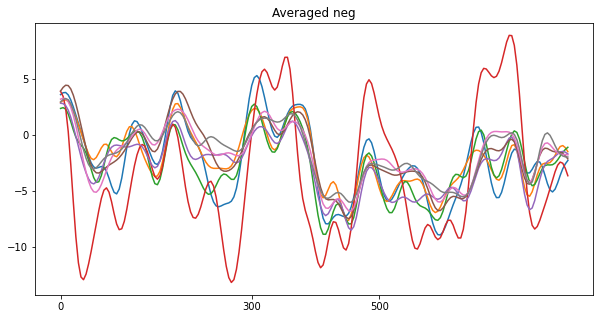

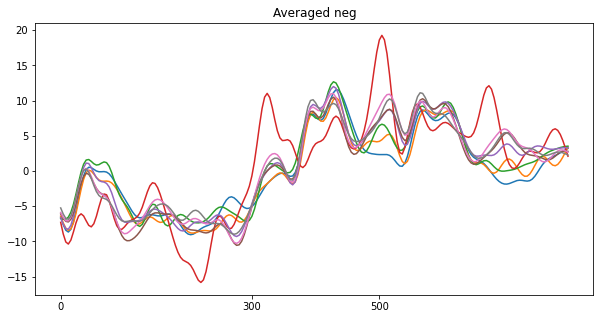

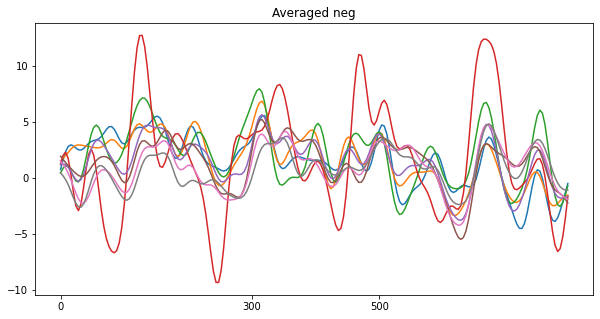

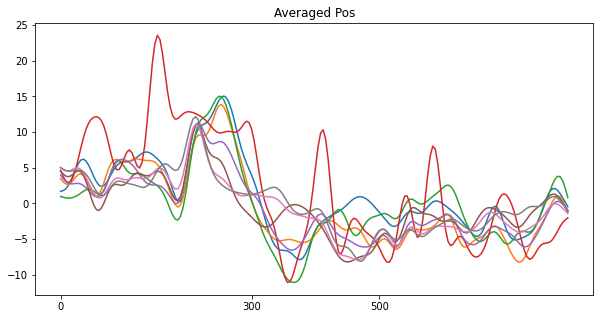

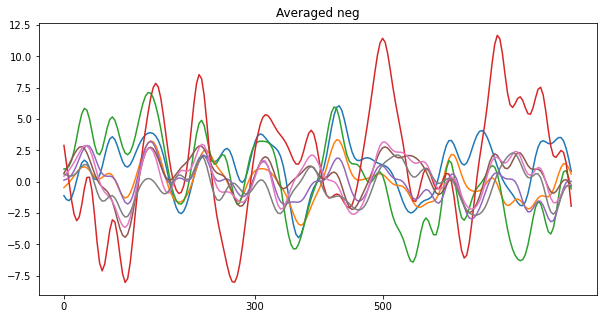

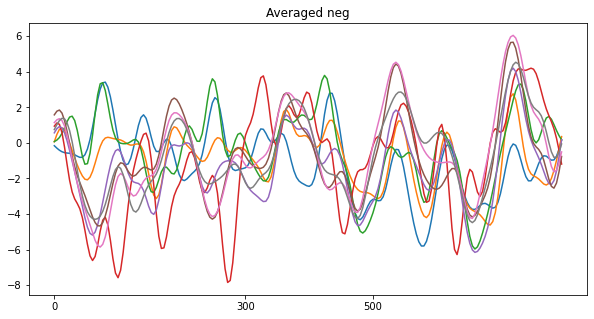

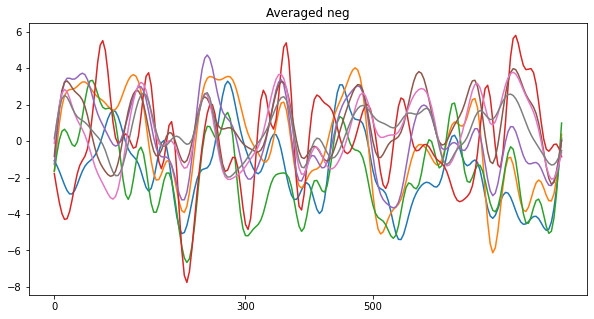

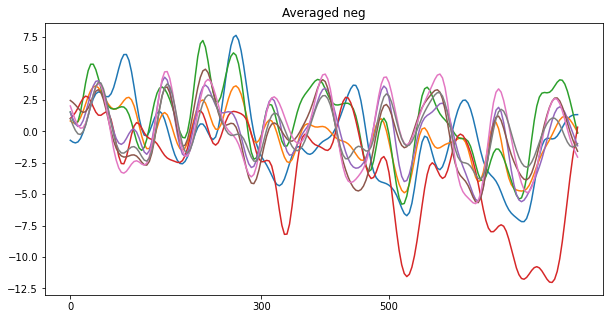

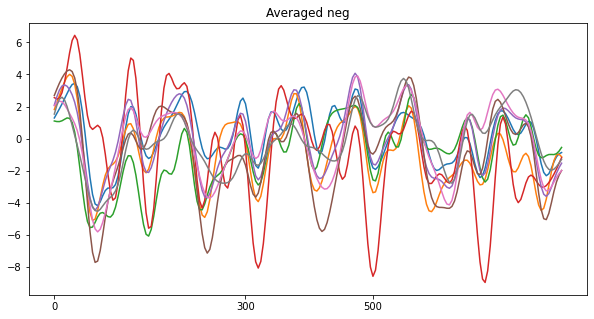

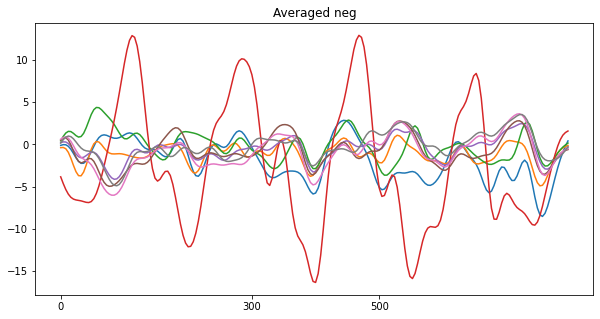

In [94]:
ctr_pos=1
ctr_neg=1
# plt.ioff()
plt.ion()
averaged_pos=np.zeros((200,8))
averaged_neg=np.zeros((200,8))
avg_pos=0
avg_neg=0
# for i in range(3,6):
for j in range(0,1200):
  temp = Y[j]
  if temp==1:
    if avg_pos<15:
      averaged_pos = averaged_pos+X[j,:]
      avg_pos+=1
    if avg_pos+1==15:
      averaged_pos = averaged_pos/15
      plt.figure(figsize=(10,5))
      plt.title("Averaged Pos")
      plt.plot(averaged_pos)
      plt.xticks([0, 75, 125], ['0', '300', '500'], rotation = 0)
      # plt.savefig("/content/drive/MyDrive/2021_VIIT_P300_Session2 /P300_ALS/Images/pos/pos-"+str(ctr_pos)+".jpeg")
      ctr_pos+=1
      avg_pos=0
  elif temp==-1:
    if avg_neg<15:
      averaged_neg = averaged_neg+X[j,:]
      avg_neg+=1
    if avg_neg+1==15:
      averaged_neg = averaged_neg/15
      plt.figure(figsize=(10,5))
      plt.title("Averaged neg")
      plt.plot(averaged_neg)
      plt.xticks([0, 75, 125], ['0', '300', '500'], rotation = 0)
      # plt.savefig("/content/drive/MyDrive/2021_VIIT_P300_Session2 /P300_ALS/Images/neg/neg-"+str(ctr_neg)+".jpeg")
      ctr_neg+=1
      avg_neg=0

In [62]:
averaged_neg.shape

(200, 8)